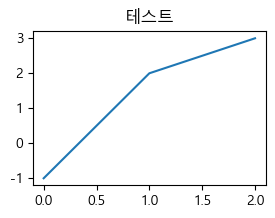

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

pd.Series([-1,2,3]).plot(title='테스트', figsize=(3,2))
pass

### 데이터프레임 생성

In [2]:
# ----------------------------
# 기상데이터 전체
#   df_all
# ---------------------------- 

df_all = pd.read_csv("C:\\Users\\User\\Documents\\VSCode\\Data School\\data school\\00.data\\기상데이터\\기상데이터_전체.csv")
df_all.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),1시간 최다강수량(mm),일강수량(mm),연도,월
0,108,서울,1907-10-01,13.5,7.9,20.7,NaN,NaN,1907,10
1,108,서울,1907-10-02,16.2,7.9,22.0,NaN,0.2,1907,10
2,108,서울,1907-10-03,16.2,13.1,21.3,NaN,2.4,1907,10
3,108,서울,1907-10-04,16.5,11.2,22.0,NaN,NaN,1907,10
4,108,서울,1907-10-05,17.6,10.9,25.4,NaN,NaN,1907,10


In [3]:
# ----------------------------
# 지점정보
#   df_location
# ---------------------------- 

df_location = pd.read_csv("C:\\Users\\User\\Documents\\VSCode\\Data School\\data school\\00.data\\기상데이터\\기상데이터_지점정보.csv")
df_location.head()

,지점,지점명,데이터수,시작년도,끝년도
0,90,속초,20910,1968,2025
1,93,북춘천,3104,2016,2025
2,95,철원,13605,1988,2025
3,98,동두천,9952,1998,2025
4,99,파주,8490,2002,2025


### 지점 입력받기


In [4]:
# --------------------
# 지점 입력받기
#   location_name
# --------------------

location_name = input("지점명을 입력하세요: ")

# --------------------
# 입력받은 지점의 정보 확인
# --------------------

df_location[df_location['지점명'] == location_name]

,지점,지점명,데이터수,시작년도,끝년도
11,108,서울,41936,1907,2025


In [5]:
df_target = df_all[df_all['지점명'] == location_name][
    ['지점', '지점명', '연도', '일시', '평균기온(°C)', '최저기온(°C)', '최고기온(°C)']
]

### 연도별 폭염 일수

In [6]:
# ---------------------------------------
# 입력한 지점의 폭염 데이터 선택
# 폭염의 기준 : 최고기온 33도 이상
#   df_hotday
# ---------------------------------------

df_hotday = df_target[df_target['최고기온(°C)'] >= 33]
df_hotday

,지점,지점명,연도,일시,평균기온(°C),최저기온(°C),최고기온(°C)
310,108,서울,1908,1908-08-06,27.5,23.7,33.6
322,108,서울,1908,1908-08-18,25.6,20.3,33.3
324,108,서울,1908,1908-08-20,27.1,21.8,33.5
673,108,서울,1909,1909-08-04,26.4,21.1,33.2
674,108,서울,1909,1909-08-05,28.5,22.9,34.5
...,...,...,...,...,...,...,...
1595767,108,서울,2024,2024-09-09,28.5,24.1,34.1
1595768,108,서울,2024,2024-09-10,29.4,25.6,33.9
1595769,108,서울,2024,2024-09-11,29.0,25.4,34.6
1595775,108,서울,2024,2024-09-17,28.6,25.8,33.2


In [7]:
# ---------------------------------------
# 연도별 폭염일수 요약
#   df_hotday_year
# ---------------------------------------

df_hotday_year = df_hotday['연도'].value_counts().sort_index().to_frame(name='폭염일수')
df_hotday_year

,폭염일수
연도,
1908,3
1909,5
1910,1
1911,5
1912,3
...,...
2020,4
2021,18
2022,10


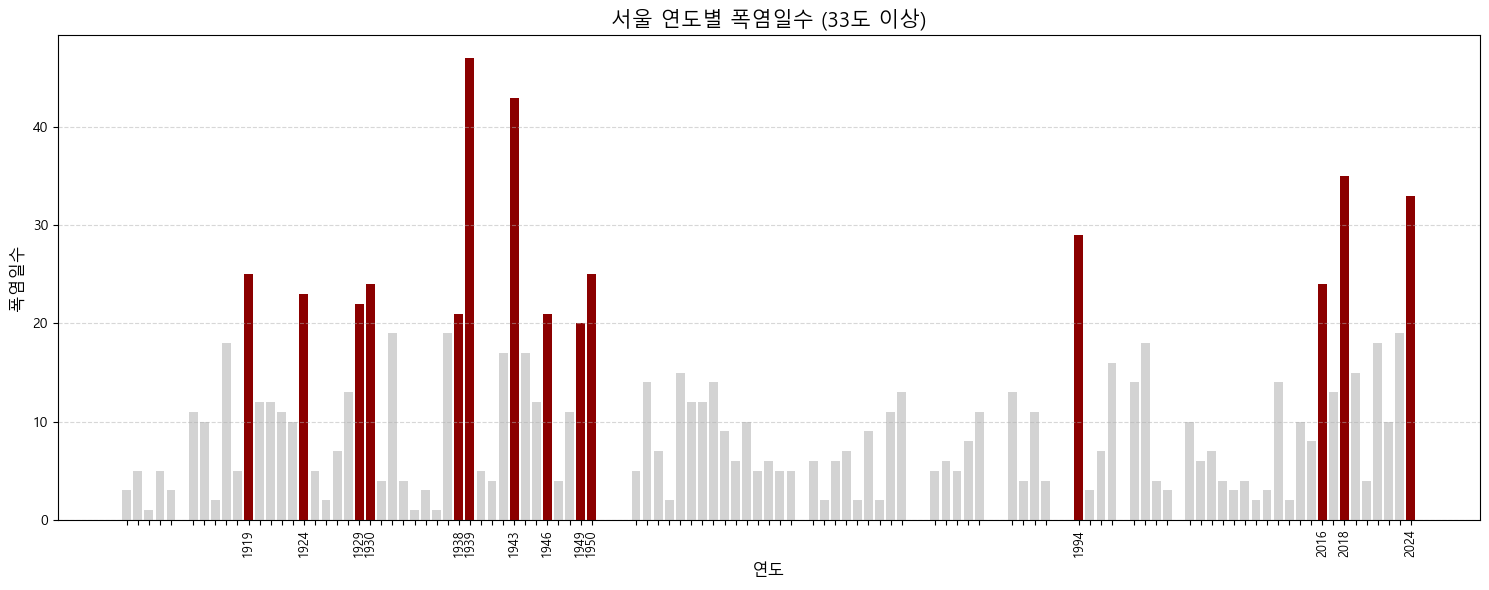

In [8]:
# ---------------------------------------
# 연도별 폭염일수 시각화
# ---------------------------------------

# 색상 지정: 20 이상은 빨간색, 아니면 회색
colors = ['darkred' if count >= 20 else 'lightgray' for count in df_hotday_year['폭염일수']]

# 눈금 표시할 연도만 추출 (20일 이상인 해)
highlight_years = df_hotday_year[df_hotday_year['폭염일수'] >= 20].index

# 시각화
plt.figure(figsize=(15, 6))
bars = plt.bar(df_hotday_year.index, df_hotday_year['폭염일수'], color=colors)

# x축 연도 전체에 대해 라벨 제거 후, 강조된 연도만 라벨 표시
plt.xticks(
    ticks=df_hotday_year.index,
    labels=[str(year) if year in highlight_years else '' for year in df_hotday_year.index],
    rotation=90,
    fontsize=9
)

plt.title(f'{location_name} 연도별 폭염일수 (33도 이상)', fontsize=15)
plt.xlabel('연도', fontsize=12)
plt.ylabel('폭염일수', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 연도별 열대야 일수

In [9]:
# ---------------------------------------
# 입력한 지점의 열대야 데이터 선택
# 열대야 기준 : 최저기온 25도 이상
#   df_hotnight
# ---------------------------------------

df_hotnight = df_target[df_target['최저기온(°C)'] >= 25]
df_hotnight = df_hotnight[['지점명', '연도', '일시', '최저기온(°C)']]
df_hotnight

,지점명,연도,일시,최저기온(°C)
677,서울,1909,1909-08-08,25.3
678,서울,1909,1909-08-09,25.6
10357,서울,1910,1910-07-29,25.0
10359,서울,1910,1910-07-31,25.2
10736,서울,1911,1911-08-12,25.8
...,...,...,...,...
1595769,서울,2024,2024-09-11,25.4
1595772,서울,2024,2024-09-14,25.2
1595775,서울,2024,2024-09-17,25.8
1595776,서울,2024,2024-09-18,26.5


In [10]:
# ---------------------------------------
# 연도별 열대야일수 요약
#   df_hotnight_year
# ---------------------------------------

df_hotnight_year = df_hotnight['연도'].value_counts().sort_index().to_frame(name='열대야일수')
df_hotnight_year

,열대야일수
연도,
1909,2
1910,2
1911,1
1914,4
1915,3
...,...
2020,14
2021,20
2022,20


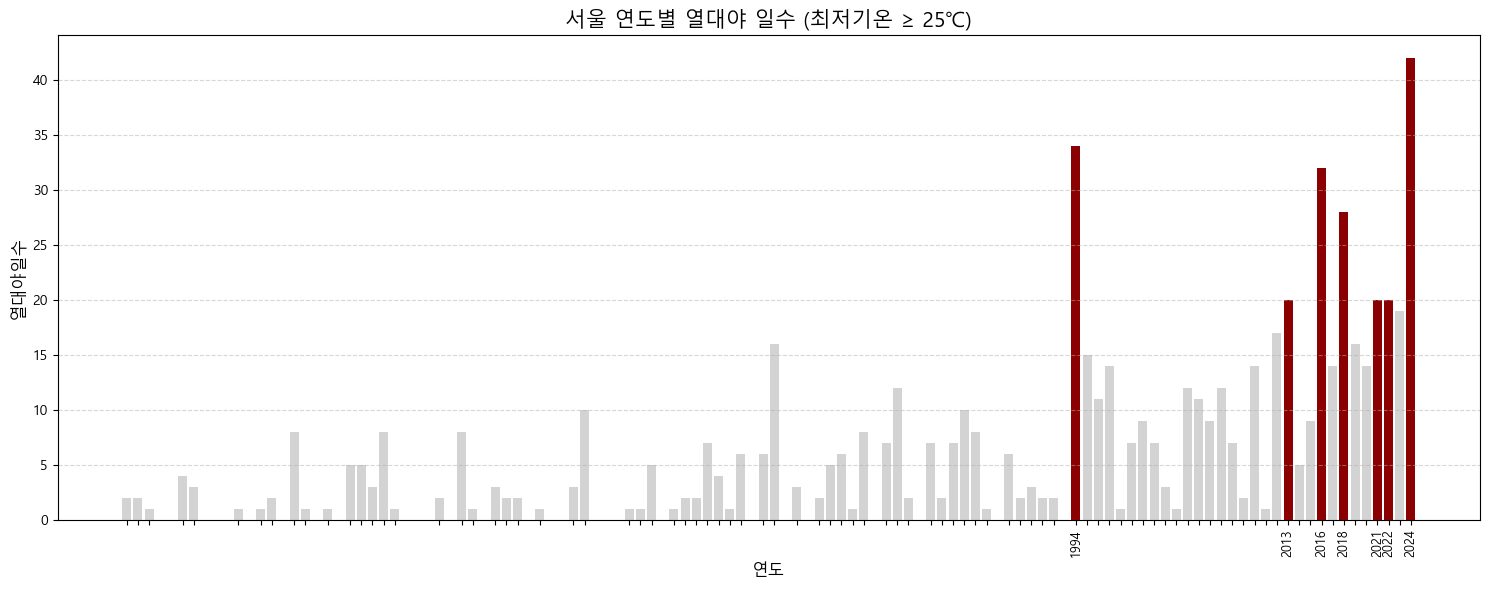

In [11]:
# ---------------------------------------
# 연도별 열대야 일수 시각화
# ---------------------------------------

import matplotlib.pyplot as plt

# 값과 인덱스
years = df_hotnight_year.index
counts = df_hotnight_year['열대야일수']

# 색상 지정: 20일 이상은 빨간색, 나머지는 회색
colors = ['darkred' if count >= 20 else 'lightgray' for count in counts]

# 눈금 표시할 연도만 추출
highlight_years = years[counts >= 20]

# 시각화
plt.figure(figsize=(15, 6))
plt.bar(years, counts, color=colors)

plt.xticks(
    ticks=years,
    labels=[str(year) if year in highlight_years else '' for year in years],
    rotation=90,
    fontsize=9
)

plt.title(f'{location_name} 연도별 열대야 일수 (최저기온 ≥ 25℃)', fontsize=15)
plt.xlabel('연도', fontsize=12)
plt.ylabel('열대야일수', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 연도별 가장 이른/늦은 폭염 열대야

In [12]:
# ---------------------------------------
# 가장 이른/늦은 폭염
#   df_hotday_early_late
# ---------------------------------------

df_hotday_early_late = df_hotday.groupby('연도')['일시'].agg(
    가장이른폭염일='min',
    가장늦은폭염일='max'
).reset_index().set_index('연도')

df_hotday_early_late

,가장이른폭염일,가장늦은폭염일
연도,,
1908,1908-08-06,1908-08-20
1909,1909-08-04,1909-08-10
1910,1910-07-30,1910-07-30
1911,1911-08-09,1911-08-17
1912,1912-08-05,1912-08-11
...,...,...
2020,2020-06-13,2020-08-26
2021,2021-07-14,2021-08-09
2022,2022-07-02,2022-07-30


In [13]:
# ---------------------------------------
# 가장 이른/늦은 열대야
#    df_hotnight_early_late
# ---------------------------------------

df_hotnight_early_late = df_hotnight.groupby('연도')['일시'].agg(
    가장이른열대야='min',
    가장늦은열대야='max'
).reset_index().set_index('연도')

df_hotnight_early_late

,가장이른열대야,가장늦은열대야
연도,,
1909,1909-08-08,1909-08-09
1910,1910-07-29,1910-07-31
1911,1911-08-12,1911-08-12
1914,1914-07-26,1914-08-15
1915,1915-07-22,1915-07-29
...,...,...
2020,2020-08-04,2020-08-29
2021,2021-07-13,2021-08-06
2022,2022-06-27,2022-08-20


### 데이터프레임 통합
* 폭염일수, 열대야일수, 가장이른폭염일, 가장늦은폭염일, 가장이른열대야일, 가장늦은열대야일

In [14]:
# ---------------------------------------------------------------------------------------
# 폭염일수, 열대야일수, 가장이른폭염일, 가장늦은폭염일, 가장이른열대야일, 가장늦은열대야일
#   df_hotdaynight
# ---------------------------------------------------------------------------------------

df_hotdaynight = pd.concat(
    [
        df_hotday_year.rename(columns={'폭염일수': '폭염일수'}),
        df_hotnight_year.rename(columns={'열대야일수': '열대야일수'}),
        df_hotday_early_late.rename(columns={
            '가장이른폭염일': '가장이른폭염일',
            '가장늦은폭염일': '가장늦은폭염일'
        }),
        df_hotnight_early_late.rename(columns={
            '가장이른열대야': '가장이른열대야일',
            '가장늦은열대야': '가장늦은열대야일'
        })
    ],
    axis=1
)

df_hotdaynight

,폭염일수,열대야일수,가장이른폭염일,가장늦은폭염일,가장이른열대야일,가장늦은열대야일
연도,,,,,,
1908,3.0,NaN,1908-08-06,1908-08-20,NaN,NaN
1909,5.0,2.0,1909-08-04,1909-08-10,1909-08-08,1909-08-09
1910,1.0,2.0,1910-07-30,1910-07-30,1910-07-29,1910-07-31
1911,5.0,1.0,1911-08-09,1911-08-17,1911-08-12,1911-08-12
1912,3.0,NaN,1912-08-05,1912-08-11,NaN,NaN
...,...,...,...,...,...,...
1979,NaN,2.0,NaN,NaN,1979-08-01,1979-08-16
1986,NaN,1.0,NaN,NaN,1986-07-31,1986-07-31
1992,NaN,2.0,NaN,NaN,1992-07-21,1992-07-29
